In [1]:
 %matplotlib inline        
 import matplotlib.pyplot as plt        
 import seaborn as sns; sns.set()        
 import numpy as np

In [2]:
 def make_data(N, f=0.3, rseed=1):            
        rand = np.random.RandomState(rseed)            
        x = rand.randn(N)            
        x[int(f * N):] += 5            
        return x 
 
 x = make_data(1000)


C:\Users\dell\Anaconda_adam\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


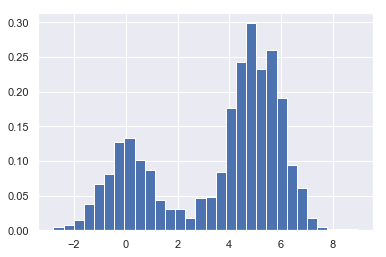

In [3]:
hist = plt.hist(x, bins=30, normed=True)

In [4]:
density, bins, patches = hist        
widths = bins[1:] - bins[:-1]        
(density * widths).sum() 

1.0

In [5]:
 x = make_data(20)        
 bins = np.linspace(-5, 10, 10) 

C:\Users\dell\Anaconda_adam\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dell\Anaconda_adam\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


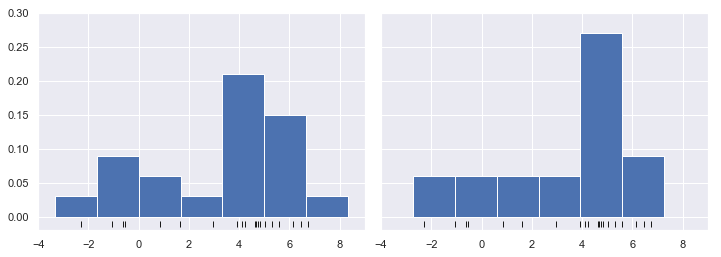

In [6]:
 fig, ax = plt.subplots(1, 2, figsize=(12, 4),                               
                        sharex=True, sharey=True,                               
                        subplot_kw={'xlim':(-4, 9),                                           
                                    'ylim':(-0.02, 0.3)})        
 fig.subplots_adjust(wspace=0.05)        
 for i, offset in enumerate([0.0, 0.6]):            
        ax[i].hist(x, bins=bins + offset, normed=True)            
        ax[i].plot(x, np.full_like(x, -0.01), '|k',                       
                   markeredgewidth=1)


(-0.2, 8)

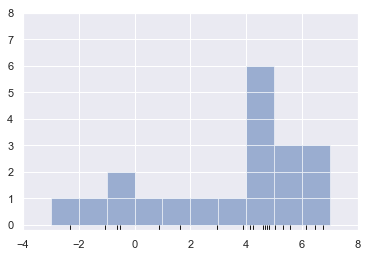

In [7]:
fig, ax = plt.subplots()        
bins = np.arange(-3, 8)        
ax.plot(x, np.full_like(x, -0.1), '|k',                
        markeredgewidth=1)        
for count, edge in zip(*np.histogram(x, bins)):            
    for i in range(count):                
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,                                           
                                   alpha=0.5))        
ax.set_xlim(-4, 8)        
ax.set_ylim(-0.2, 8) 

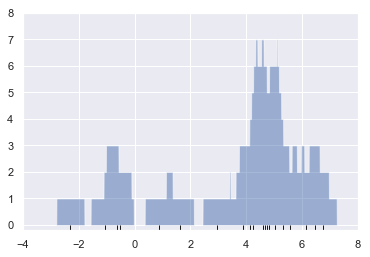

In [8]:
 x_d = np.linspace(-4, 8, 2000)        
 density = sum((abs(xi - x_d) < 0.5) for xi in x) 
 
 plt.fill_between(x_d, density, alpha=0.5)        
 plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1) 
 
       
 plt.axis([-4, 8, -0.2, 8]);


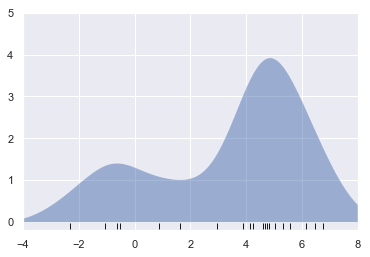

In [9]:
from scipy.stats import norm        
x_d = np.linspace(-4, 8, 1000)        
density = sum(norm(xi).pdf(x_d) for xi in x) 
 
plt.fill_between(x_d, density, alpha=0.5)        
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1) 
 
plt.axis([-4, 8, -0.2, 5]);


(-0.02, 0.22)

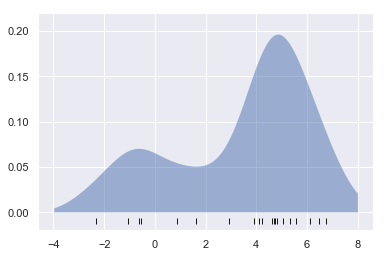

In [10]:
 from sklearn.neighbors import KernelDensity 
 
 # 初始化并拟合KDE模型         
 kde = KernelDensity(bandwidth=1.0, kernel='gaussian')         
 kde.fit(x[:, None]) 
 
 # score_samples返回概率密度的对数值         
 logprob = kde.score_samples(x_d[:, None]) 
 
 plt.fill_between(x_d, np.exp(logprob), alpha=0.5)         
 plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)         
 plt.ylim(-0.02, 0.22) 
 

In [11]:
 from sklearn.grid_search import GridSearchCV         
 from sklearn.cross_validation import LeaveOneOut 
 
 bandwidths = 10 ** np.linspace(-1, 1, 100)     
 grid = GridSearchCV(KernelDensity(kernel='gaussian'),                             
                     {'bandwidth': bandwidths},                             
                     cv=LeaveOneOut(len(x)))         
 grid.fit(x[:, None]);


ImportError: No module named grid_search

In [12]:
grid.best_params_ 

NameError: name 'grid' is not defined

In [13]:
 from sklearn.datasets import fetch_species_distributions 
 
 data = fetch_species_distributions() 
 
 # 获取物种ID和位置矩阵/数组         
 latlon = np.vstack([data.train['dd lat'],                             
                     data.train['dd long']]).T         
 species = np.array([d.decode('ascii').startswith('micro')                             
                     for d in data.train['species']], dtype='int')


IOError: [Errno socket error] [SSL: UNKNOWN_PROTOCOL] unknown protocol (_ssl.c:726)